In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

***Importing libs***

In [0]:
from google.colab import files
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import roc_curve, auc




***Kaggle configs***

In [3]:
files.upload()
!pip install -U -q keras
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c santander-customer-transaction-prediction

Saving kaggle.json to kaggle.json
 96% 117M/122M [00:01<00:00, 107MB/s] 
100% 122M/122M [00:01<00:00, 110MB/s]
  0% 0.00/463k [00:00<?, ?B/s]
100% 463k/463k [00:00<00:00, 89.7MB/s]
 86% 105M/122M [00:01<00:00, 82.3MB/s] 
100% 122M/122M [00:01<00:00, 112MB/s] 


***Data Processing***

In [0]:
def data():
  train_data = pd.read_csv('train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
  test_data = pd.read_csv('test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
  
  x_validation = test_data.iloc[:,1:].values
  Y_train = train_data['target']
  X_train = train_data.drop(['target','ID_code'], axis=1)
  x_train, x_test, y_train, y_test = train_test_split( X_train, Y_train, test_size=1/7.0, random_state=0)

  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test)
  x_validation = sc.transform(x_validation)
  
  return x_train, y_train, x_test, y_test, x_validation

***Visualizing the data***

In [0]:
x_train, y_train, x_test, y_test, x_validation = data()

Text(0.5, 1.0, 'Scatter of Test')

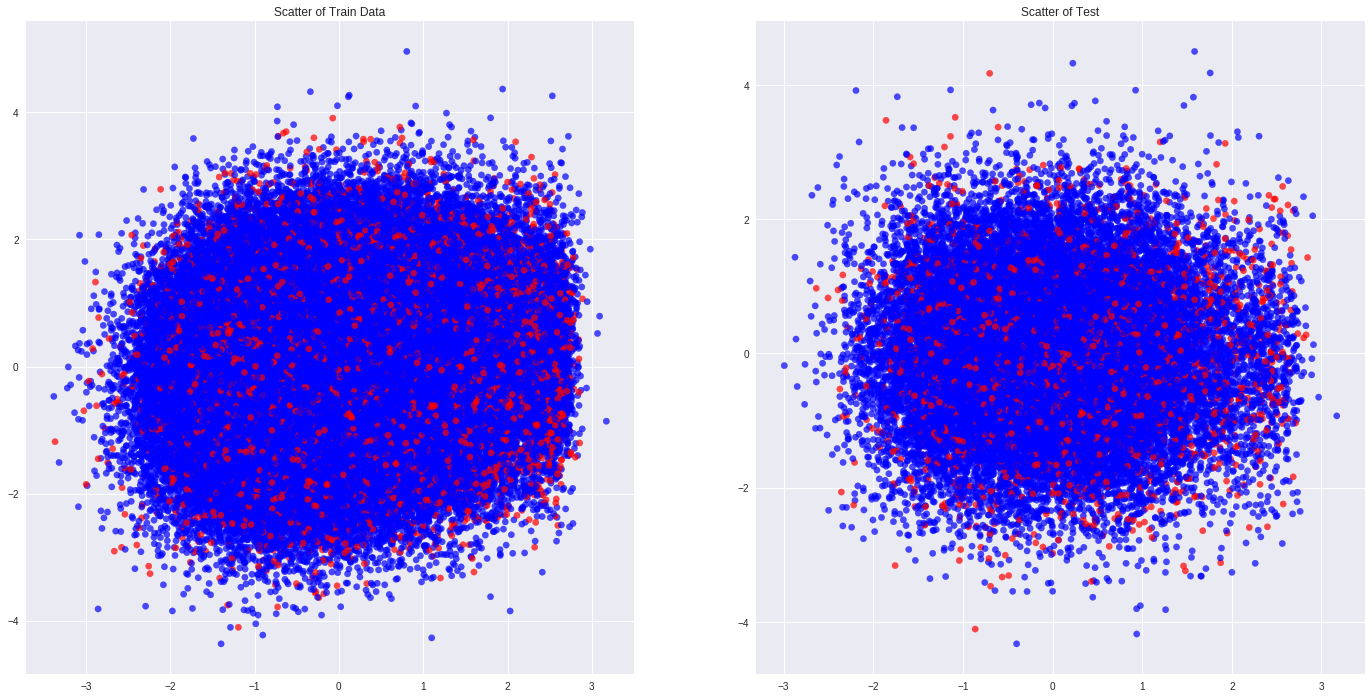

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (24, 12))
pca = PCA()
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.fit_transform(x_test)


ax[0].scatter(x_train[:, 0], x_train_reduced[:, 1], c=y_train, alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
ax[0].set_title('Scatter of Train Data')

ax[1].scatter(x_test[:, 0], x_test_reduced[:, 1], c=y_test, alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
ax[1].set_title('Scatter of Test')

In [12]:
pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('quantiletransformer', QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='normal', random_state=None,
          subsample=100000)), ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))])

Pipeline(memory=None,
     steps=[('quantiletransformer', QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='normal', random_state=None,
          subsample=100000)), ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))])

0.5

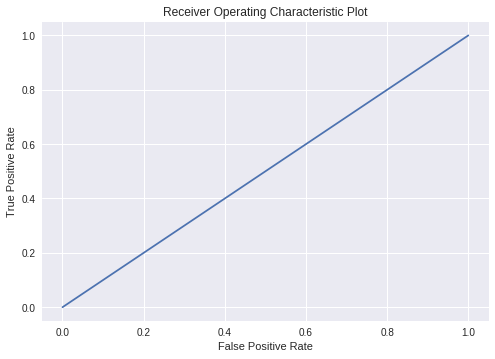

In [18]:
fpr, tpr, thr = roc_curve(y_train, pipeline.predict_proba(x_train)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
auc(fpr, tpr)

In [19]:
cross_val_score(pipeline, x_train, y_train, scoring='roc_auc', cv=10).mean()

0.8901309649418889

In [0]:
y_pred = pipeline.predict(x_test)

In [0]:
y_validation = pipeline.predict_proba(x_validation)[:,1]

In [0]:
sample_submission = pd.read_csv('sample_submission.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
sample_submission['target'] = y_validation


In [22]:
!rm submission.csv

rm: cannot remove 'submission.csv': No such file or directory


In [0]:
sample_submission.to_csv('submission.csv',index = False)

In [0]:
from google.colab import files
files.download('submission.csv') 